# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import jenkspy
from scipy.stats import zscore

# Question 5

## Part a

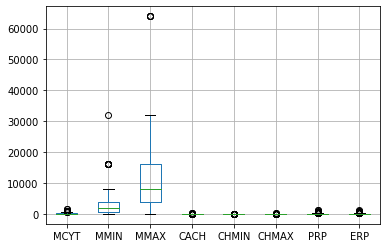

In [ ]:
boxplot = df_machines.boxplot(column=['MCYT', 'MMIN', 'MMAX', 'CACH', 'CHMIN','CHMAX','PRP','ERP'])

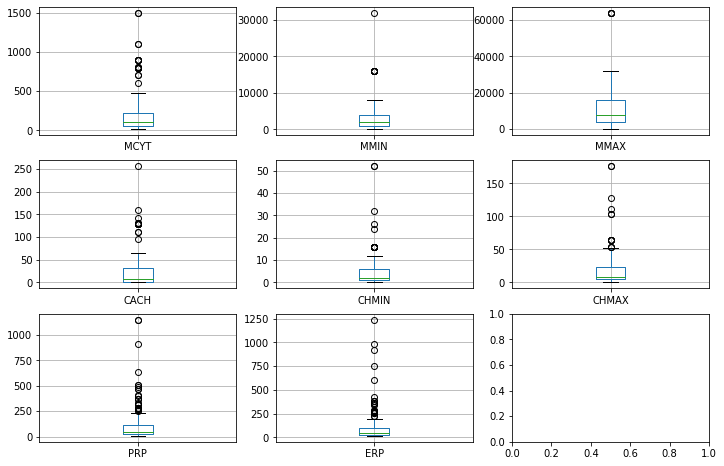

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

df_machines.boxplot('MCYT', ax=axes[0, 0])
df_machines.boxplot('MMIN', ax=axes[0, 1])
df_machines.boxplot('MMAX', ax=axes[0, 2])
df_machines.boxplot('CACH', ax=axes[1, 0])
df_machines.boxplot('CHMIN', ax=axes[1, 1])
df_machines.boxplot('CHMAX', ax=axes[1, 2])
df_machines.boxplot('PRP', ax=axes[2, 0])
df_machines.boxplot('ERP', ax=axes[2, 1])

## Part b

### روش اول

In [ ]:
cols = list(df_machines.columns)
cols.remove('Vendor_name')
cols.remove('model')
df_machines[cols]

,index,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0,29,8000,32000,32,8,32,269,253
1,1,29,8000,32000,32,8,32,220,253
2,2,29,8000,32000,32,8,32,172,253
3,3,29,8000,16000,32,8,16,132,132
4,4,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...
203,203,124,1000,8000,0,1,8,42,37
204,204,98,1000,8000,32,2,8,46,50
205,205,125,2000,8000,0,2,14,52,41
206,206,480,512,8000,32,0,0,67,47


In [ ]:
df_machines_new = pd.DataFrame()
for col in cols:
    col_zscore = col + '_zscore'
    df_machines_new[col_zscore] = (df_machines[col] - df_machines[col].mean())/df_machines[col].std(ddof=0)

In [ ]:
df_machines_new

,index_zscore,MCYT_zscore,MMIN_zscore,MMAX_zscore,CACH_zscore,CHMIN_zscore,CHMAX_zscore,PRP_zscore,ERP_zscore
0,-1.723744,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,1.019412,0.997070
1,-1.707089,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.714501,0.997070
2,-1.690435,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.415812,0.997070
3,-1.673780,-0.673322,1.321325,0.356323,0.211741,0.495619,-0.070026,0.166905,0.214415
4,-1.657125,-0.684851,1.321325,1.721553,1.069007,0.495619,0.573749,1.324323,1.236395
...,...,...,...,...,...,...,...,...,...
203,1.657125,-0.308226,-0.485364,-0.326291,-0.645526,-0.538223,-0.391913,-0.393136,-0.400066
204,1.673780,-0.408147,-0.485364,-0.326291,0.211741,-0.390531,-0.391913,-0.368245,-0.315979
205,1.690435,-0.304382,-0.227266,-0.326291,-0.645526,-0.390531,-0.150498,-0.330909,-0.374193
206,1.707089,1.059925,-0.611316,-0.326291,0.211741,-0.685914,-0.713801,-0.237569,-0.335384


In [ ]:
ls_tmp = [not i for i in list((np.abs(df_machines_new) > 3).any(axis = 1))]

In [ ]:
cdf1 = df_machines_new.loc[ls_tmp]

In [ ]:
cdf1

,index_zscore,MCYT_zscore,MMIN_zscore,MMAX_zscore,CACH_zscore,CHMIN_zscore,CHMAX_zscore,PRP_zscore,ERP_zscore
0,-1.723744,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,1.019412,0.997070
1,-1.707089,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.714501,0.997070
2,-1.690435,-0.673322,1.321325,1.721553,0.211741,0.495619,0.573749,0.415812,0.997070
3,-1.673780,-0.673322,1.321325,0.356323,0.211741,0.495619,-0.070026,0.166905,0.214415
4,-1.657125,-0.684851,1.321325,1.721553,1.069007,0.495619,0.573749,1.324323,1.236395
...,...,...,...,...,...,...,...,...,...
203,1.657125,-0.308226,-0.485364,-0.326291,-0.645526,-0.538223,-0.391913,-0.393136,-0.400066
204,1.673780,-0.408147,-0.485364,-0.326291,0.211741,-0.390531,-0.391913,-0.368245,-0.315979
205,1.690435,-0.304382,-0.227266,-0.326291,-0.645526,-0.390531,-0.150498,-0.330909,-0.374193
206,1.707089,1.059925,-0.611316,-0.326291,0.211741,-0.685914,-0.713801,-0.237569,-0.335384


### روش دوم

In [ ]:
cols1 = list(df_machines.columns)
cols1.remove('Vendor_name')
cols1.remove('model')

In [ ]:
z_score = zscore(df_machines[cols1])
z_score.shape

(208, 9)

In [ ]:
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cdf1 = df_machines[filtered_entries]

In [ ]:
cdf1

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...,...
203,203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,205,sratus,32,125,2000,8000,0,2,14,52,41
206,206,wang,vs-100,480,512,8000,32,0,0,67,47


## Part c

In [ ]:
Q1 = df_machines.quantile(0.25)
Q3 = df_machines.quantile(0.75)
IQR = Q3 - Q1
IQR

index      103.5
MCYT       175.0
MMIN      3232.0
MMAX     12000.0
CACH        32.0
CHMIN        5.0
CHMAX       19.0
PRP         84.5
ERP         71.5
dtype: float64

In [ ]:
cdf2 = df_machines[~((df_machines < (Q1 - 1.5 * IQR)) |(df_machines > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
cdf2

,index,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
3,3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
9,9,apollo,dn320,400,1000,3000,0,1,2,38,23
10,10,apollo,dn420,400,512,3500,4,1,6,40,24
11,11,basf,7/65,60,2000,8000,65,1,8,92,70
12,12,basf,7/68,50,4000,16000,65,1,8,138,117
...,...,...,...,...,...,...,...,...,...,...,...
203,203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,205,sratus,32,125,2000,8000,0,2,14,52,41
206,206,wang,vs-100,480,512,8000,32,0,0,67,47
